In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width: 90% !important}; </style>"))

# Loading Data

In [28]:
data_folder = './data/'

train = pd.read_csv(data_folder + 'train.csv', index_col=0)
test = pd.read_csv(data_folder + 'test.csv', index_col=0)

In [82]:
# We will sort them for easy visualization (we could not assume random sample neither)
train = train.sort_values('label')
test = test.sort_values('label')

In [22]:
def df_info(df: pd.DataFrame):
    print(df.shape)
    display(df.head(3))

In [83]:
df_info(train)

(11200, 2)


,path_img,label
idx_train,,
0,./data/all_imgs/bc7696f4-1460-4d0b-a63d-f84b3b...,0
4775,./data/all_imgs/4a1215d3-12d1-4dae-8eb9-f9e8d8...,0
8863,./data/all_imgs/4b760fcc-df88-4a55-af15-8b5c90...,0


In [24]:
df_info(test)

(4800, 2)


,path_img,label
idx_test,,
0,all_imgs/ec4c75ba-e064-4ed0-a7b1-3ed899424110....,6
1,all_imgs/114fb94d-3223-4d95-b6d1-f6a6ac206ea2....,2
2,all_imgs/a80e7e27-a25a-40aa-a65c-a29bfa172b3d....,6


# Data Exploration

In [21]:
# Check we have same labels in both dataframes
assert set(train['label'].unique()) - set(test['label'].unique()) == set()

<Axes: >

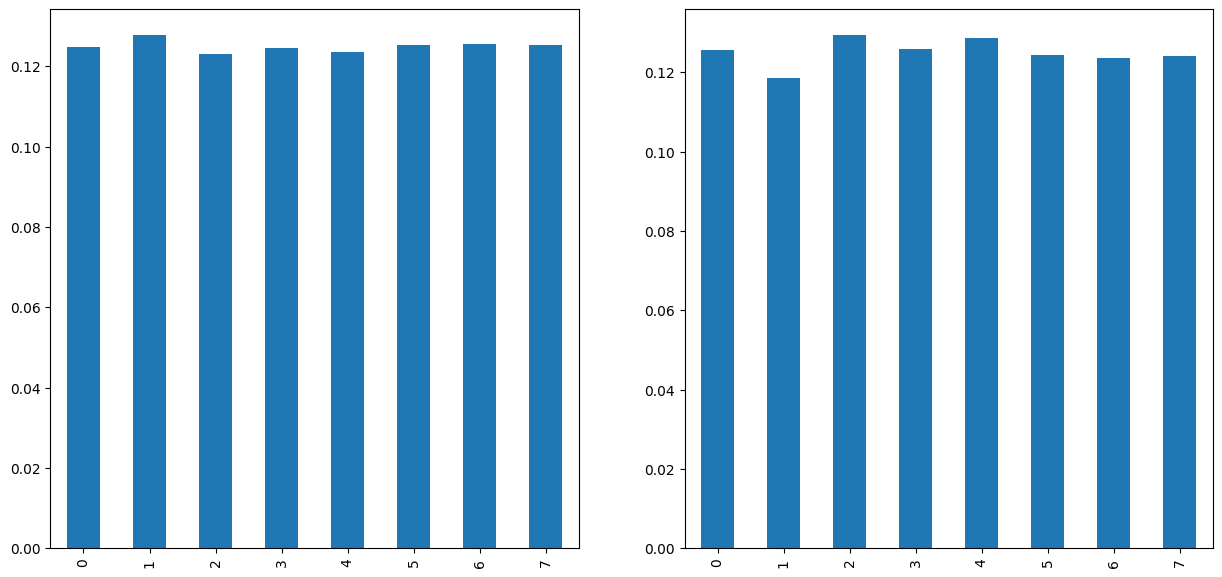

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

train.label.value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax1)
test.label.value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax2)

TODO: We can see that it is similar to a uniform distribution.

Let's visualize some examples of each class.

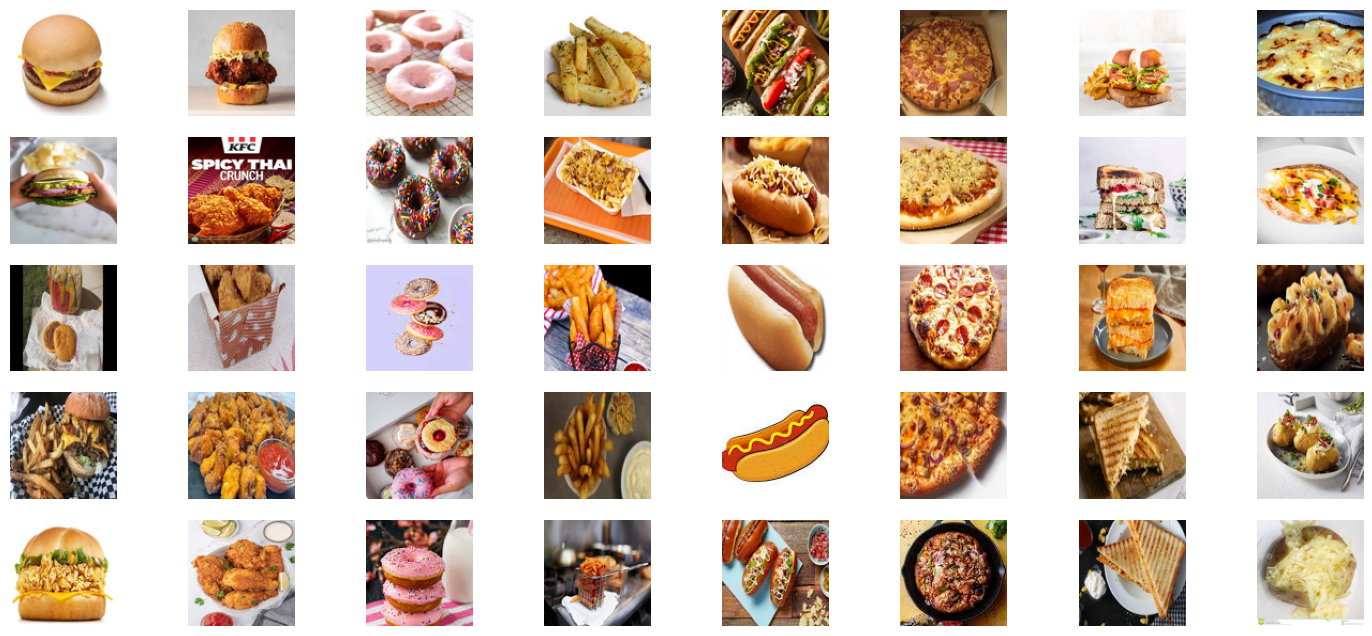

In [161]:
def visualize_labels(
    df: pd.DataFrame, 
    num_per_label: int = 5, 
    label_column: str = 'label', 
    img_column: str = 'path_img'
):
    
    unique_labels = df[label_column].unique()
    
    fig, ax = plt.subplots(
        num_per_label, 
        len(unique_labels), 
        figsize=(18, 8)
    )

    for label_counter, label in enumerate(unique_labels):
        df_label = df[df[label_column] == label]

        for idx_counter, idx in enumerate(df_label.index.values[:num_per_label]):
            img = Image.open(df_label.loc[idx, img_column])
            
            img_resized = img.resize((100, 100))
            
            ax[idx_counter, label_counter].imshow(img_resized)
            ax[idx_counter, label_counter].axis('off')
                
    plt.show()

visualize_labels(train)

The classes are displayed vertically, and we can see that for example in the second column there is a hamburguer (which seems to be the class of the first column).

So we can't assume that all the classes are correctly labeled.

# Data Processing

The image files are inside of data folder, so we have to correct which is the path of the image.

In [29]:
def get_path_img(path_img):
    return data_folder + path_img

train.path_img = train.path_img.apply(lambda x: get_path_img(x))
test.path_img = test.path_img.apply(lambda x: get_path_img(x))

In [162]:
train.to_csv(data_folder + 'train_processed.csv', index=False, header=True)
test.to_csv(data_folder + 'test_processed.csv', index=False, header=True)